In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
from google.colab import files
uploaded = files.upload()

Saving stock_data[1].csv to stock_data[1].csv


In [3]:
df = pd.read_csv('stock_data[1].csv')
df.head()

,Unnamed: 0,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5
0,2020-01-01,101.764052,100.160928,99.494642,99.909756,101.761266
1,2020-01-02,102.171269,99.969968,98.682973,100.640755,102.528643
2,2020-01-03,103.171258,99.575237,98.182139,100.574847,101.887811
3,2020-01-04,105.483215,99.308641,97.149381,100.925017,101.490049
4,2020-01-05,107.453175,98.188428,99.575396,101.594411,101.604283


In [4]:
df.columns = ['Date', 'Opening Price', 'High Price', 'Low Price', 'Closing Price', 'Volume']


In [5]:
print(df.columns)

Index(['Date', 'Opening Price', 'High Price', 'Low Price', 'Closing Price',
       'Volume'],
      dtype='object')


In [6]:
df["Date"] = pd.to_datetime(df["Date"])
df.set_index("Date", inplace=True)

In [8]:
df["Target"] = df["Opening Price"].shift(-1)
df.dropna(inplace=True)

In [9]:
X = df[["Opening Price", "High Price", "Low Price", "Closing Price", "Volume"]]

In [10]:
y = df["Target"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)

In [14]:
lr_preds = lr_model.predict(X_test)

In [15]:
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_preds))
print("Linear Regression RMSE:", lr_rmse)

Linear Regression RMSE: 1.0345133069757773


In [17]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=20)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [20]:
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
print("Random Forest RMSE:", rf_rmse)

Random Forest RMSE: 1.1735507113817998


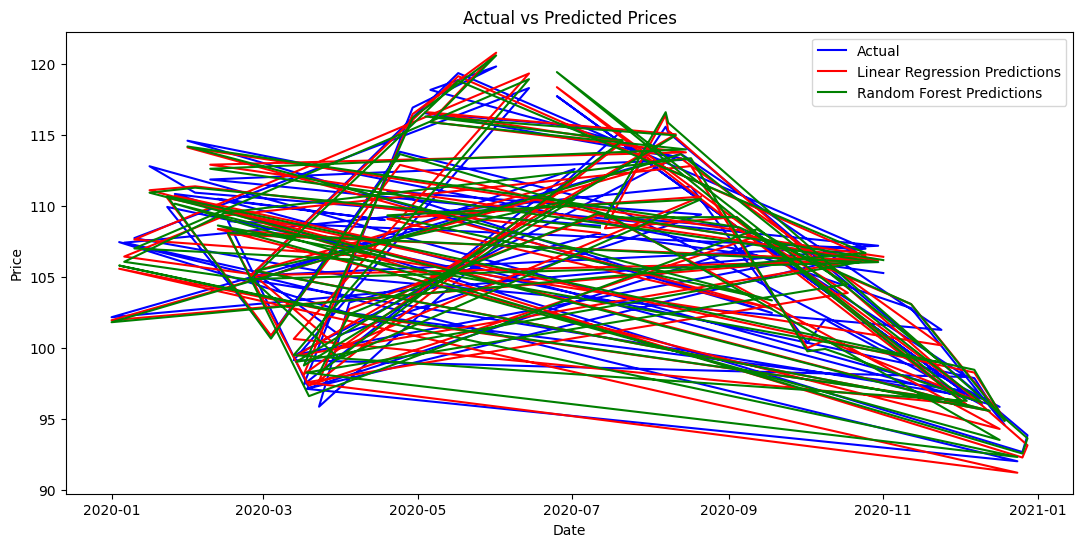

In [21]:
plt.figure(figsize=(13,6))
plt.plot(y_test.index, y_test.values, label='Actual', color="blue")
plt.plot(y_test.index, lr_predictions, label='Linear Regression Predictions', color = "red")
plt.plot(y_test.index, rf_predictions, label='Random Forest Predictions', color="green")
plt.title('Actual vs Predicted Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()